<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/Food-Classification/blob/main/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Classification



# Steps to Build
1.Import libraries and Install Requirements

2.Import Dataset

3.Vizualize the data

4.Data Preprocessing and Augmentation

5.Build the Model

6.Evaluate the model

7.predictions on the test set

# 1.Import libraries and Install Requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
!pip install kaggle

# 2.Import Dataset
Dataset url: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kakumanuharshitha","key":"06de50b59fe4e1311ff0d781072953d4"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d  trolukovich/food11-image-dataset

Dataset URL: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset
License(s): CC0-1.0
100% 1.08G/1.08G [00:13<00:00, 136MB/s]
100% 1.08G/1.08G [00:13<00:00, 87.8MB/s]


In [ ]:
!ls


food11-image-dataset.zip  sample_data


# Unzip the dataset

In [ ]:

import zipfile
zip_path = '/content/food11-image-dataset.zip'
extract_dir = '/content/tmp_dataset/'
# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
import os
os.listdir(extract_dir)


['validation', 'evaluation', 'training']

In [ ]:
!ls

food11-image-dataset.zip  sample_data  tmp_dataset


**To get the class names**

In [ ]:

image_dir = '/content/tmp_dataset/training'
class_folders = os.listdir(image_dir)
print(class_folders)

['Egg', 'Soup', 'Bread', 'Seafood', 'Rice', 'Fried food', 'Dairy product', 'Meat', 'Dessert', 'Noodles-Pasta', 'Vegetable-Fruit']


# 3.Vizualize the data

In [ ]:
print(type(class_folders))

<class 'list'>


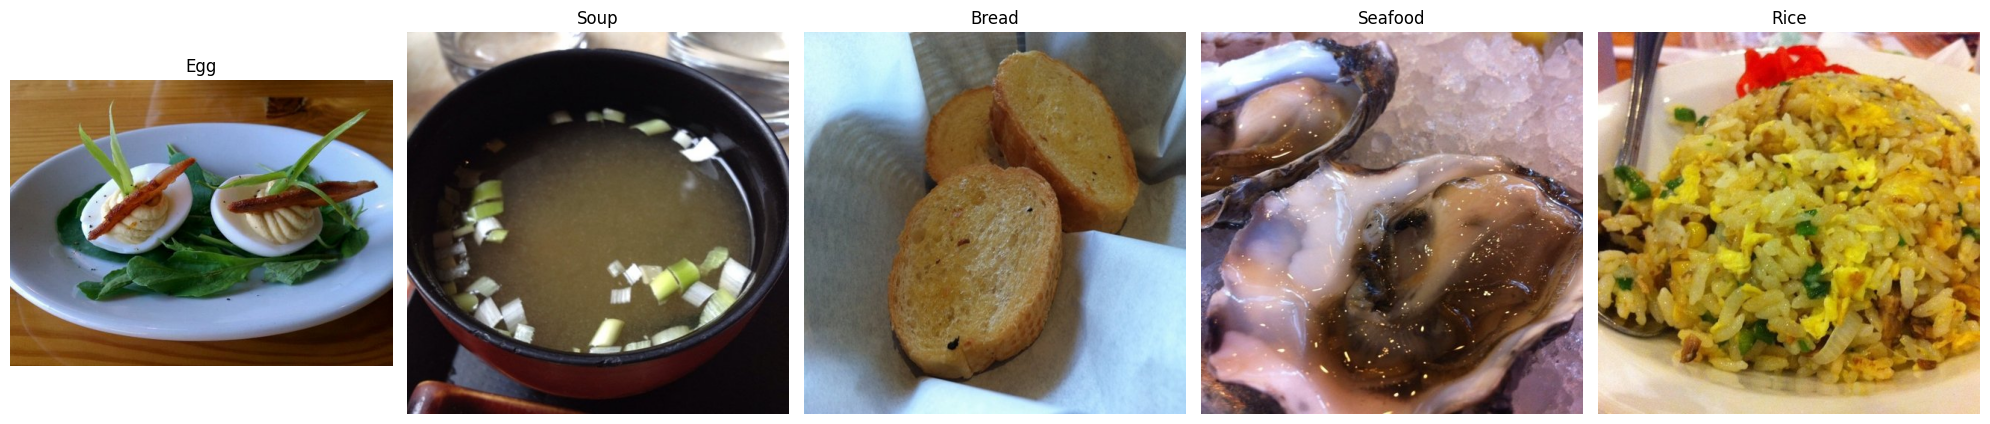

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
image_dir = '/content/tmp_dataset/training'
class_folders = os.listdir(image_dir)
num_classes = len(class_folders)
fig, axes = plt.subplots(1, min(num_classes, 5), figsize=(20, 10))
for i, class_folder in enumerate(class_folders[:5]):
    class_path = os.path.join(image_dir, class_folder)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if any(f.endswith(ext) for ext in ['.jpg', '.jpeg', '.png'])]
        if image_files:
            random_image = random.choice(image_files)
            image_path = os.path.join(class_path, random_image)
            try:
              img = mpimg.imread(image_path)
              axes[i].imshow(img)
              axes[i].set_title(f"{class_folder}")
              axes[i].axis('off')
            except Exception as e:
              print(f"Error displaying image {image_path}: {e}")
plt.tight_layout()
plt.show()


# 4.Data Preprocessing and Augmentation

 Image data preprocessing and augmentation for training, validation, and testing using TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
img_width, img_height = 224, 224
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Loads and preprocesses image data for training, validation  and test using Keras' ImageDataGenerator.flow_from_directory automatically loads images from the specified directories, applies preprocessing, and generates batches for training.

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/tmp_dataset/training',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  )

validation_generator = validation_datagen.flow_from_directory(
    '/content/tmp_dataset/validation',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/tmp_dataset/evaluation',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  )

Found 3347 images belonging to 11 classes.


# 5.Build the Model

lets fine tune a MobileNetV2 architecture on food image classification.

In [ ]:
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(len(class_folders), activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=x)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Compile the model

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit The Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples ,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 309/9866 ━━━━━━━━━━━━━━━━━━━━ 1:04:19 404ms/step - accuracy: 0.6507 - loss: 1.0657

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9866/9866 ━━━━━━━━━━━━━━━━━━━━ 153s 14ms/step - accuracy: 0.7306 - loss: 0.8172 - val_accuracy: 0.7778 - val_loss: 0.6788
Epoch 2/30
9866/9866 ━━━━━━━━━━━━━━━━━━━━ 189s 14ms/step - accuracy: 0.8231 - loss: 0.5218 - val_accuracy: 0.8108 - val_loss: 0.5753
Epoch 3/30
9866/9866 ━━━━━━━━━━━━━━━━━━━━ 140s 14ms/step - accuracy: 0.8519 - loss: 0.4377 - val_accuracy: 0.8251 - val_loss: 0.5370
Epoch 4/30
9866/9866 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - accuracy: 0.8736 - loss: 0.3650 - val_accuracy: 0.8294 - val_loss: 0.5328
Epoch 5/30
9866/9866 ━━━━━━━━━━━━━━━━━━━━ 132s 13ms/step - accuracy: 0.8911 - loss: 0.3128 - val_accuracy: 0.8335 - val_loss: 0.5262
Epoch 6/30
9866/9866 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - accuracy: 0.9039 - loss: 0.2755 - val_accuracy: 0.8318 - val_loss: 0.5324
Epoch 7/30
9866/9866 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - accuracy: 0.9237 - loss: 0.2282 - val_accuracy: 0.8259 - val_loss: 0.5513
Epoch 8/30
9866/9866 ━━━━━━━━━━━━━━━━━━━━ 139s 14ms/step - accuracy: 0.9312 - lo

# 6.Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

3347/3347 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8496 - loss: 0.7595   
Test Loss: 0.7607916593551636
Test Accuracy: 0.8494173884391785


# 7.predictions on the test set

In [ ]:

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_actual= test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print(y_pred)
print(y_pred.shape)
print(y_actual)
print(y_actual.shape)
print(class_labels)

105/105 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step
[ 2 10  5 ...  2  5  0]
(3347,)
[ 0  0  0 ... 10 10 10]
(3347,)
['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[39 24 54 30 29 62 12 15 37 42 24]
 [16  7 26  5  6 31  5  5 18 15 14]
 [66 21 58 44 33 97 22 10 37 74 38]
 [46 12 34 23 24 63 14 14 40 42 23]
 [38 12 48 23 19 38 15  6 30 37 21]
 [63 24 47 25 33 61 29 14 30 76 30]
 [21  5 23 20 11 23  5  3  7 18 11]
 [13  4  5 11  7 19  4  2  8 15  8]
 [35 12 30 23 28 44 12 11 35 50 23]
 [54 29 66 38 37 83 20 14 50 71 38]
 [23 14 34 20 12 41  7  8 28 31 13]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


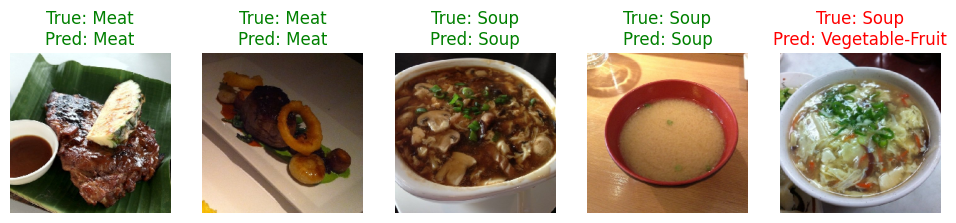

In [ ]:
def predict_from_test_generator(model, test_generator, class_labels, num_images=5):
    """Predict and display true vs. predicted images."""
    images, true_labels = next(test_generator)
    true_classes = np.argmax(true_labels, axis=1)
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        true_label = class_labels[true_classes[i]]
        predicted_label = class_labels[predicted_classes[i]]
        color = "green" if true_label == predicted_label else "red"
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
    plt.show()
class_labels = list(test_generator.class_indices.keys())

# Run prediction and display
predict_from_test_generator(model, test_generator, class_labels, num_images=5)